In [2]:
%pip install pystan
%pip install prophet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import our libraries 
from prophet import Prophet
from datetime import timedelta
# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np
# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
# Use inline so our visualizations display in notebook
%matplotlib inline

## #1 Inspect and explore data.

In [4]:
df_energy = pd.read_csv('../data/energy.csv')
df_energy.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [5]:
#Description
df_energy.describe()

,Unnamed: 0,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
count,55440.000000,55440.0000,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,27719.500000,1999.5000,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,16004.293799,11.5435,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,0.000000,1980.0000,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,13859.750000,1989.7500,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,27719.500000,1999.5000,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,41579.250000,2009.2500,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,55439.000000,2019.0000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


## Time Series with Prophet to get Energy consumption for selected country

/tmp/ipykernel_123025/2203291025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['ds'] = pd.to_datetime(country_data['Year'], format='%Y')
/tmp/ipykernel_123025/2203291025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['y'] = country_data['Energy_consumption']
02:03:27 - cmdstanpy - INFO - Chain [1] start processing
02:03:27 - cmdstanpy - INFO - Chain [1] done processing
/home/skhan/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is de

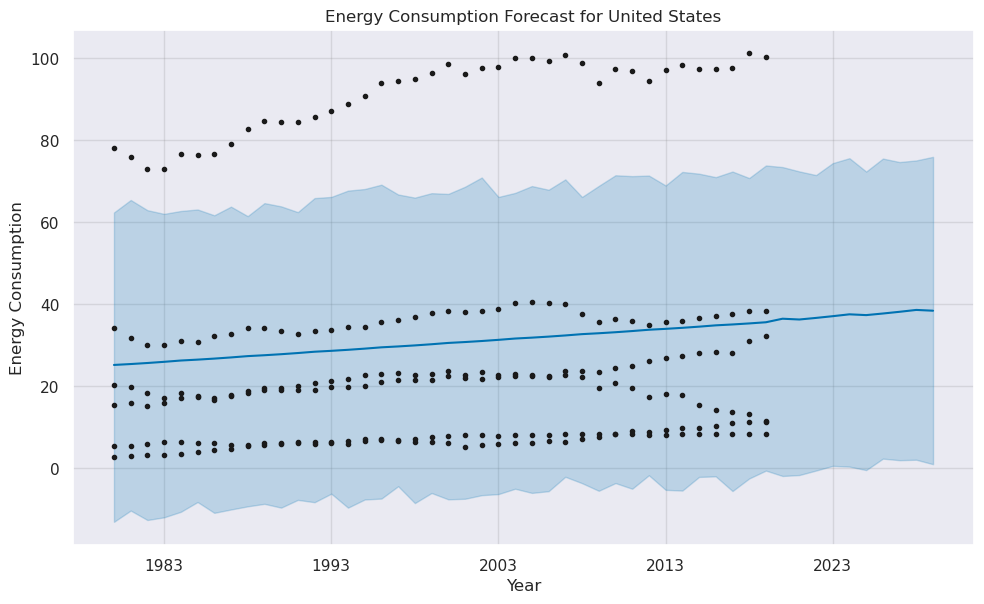

/home/skhan/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


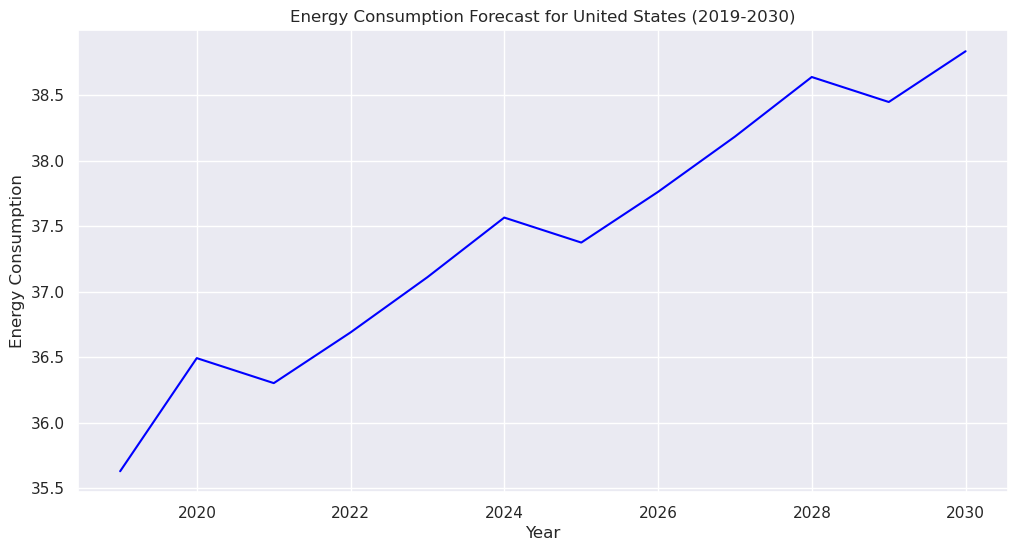

In [6]:
# replace with your desired country
country = 'United States'

country_data = df_energy[df_energy['Country'] == country]

# Prepare the data for Prophet
country_data['ds'] = pd.to_datetime(country_data['Year'], format='%Y')
country_data['y'] = country_data['Energy_consumption']

# Create and fit the Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(country_data)

# Make future dataframe - Full Forecast
future = model.make_future_dataframe(periods=10, freq='Y')

# Predict future values
forecast = model.predict(future)

# Plot the forecast 
fig = model.plot(forecast)  

#plt.gca().lines[1] 
#plt.gca().collections[0]
plt.title(f'Energy Consumption Forecast for {country}')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()


future = model.make_future_dataframe(periods=11, freq='Y')  # 11 years from 2019 to 2030

# Predict future values 
forecast = model.predict(future)

# Filter the forecast for 2019-2030
forecast_2019_2030 = forecast[forecast['ds'].dt.year >= 2019]

# Plot the forecast for 2019-2030
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(forecast_2019_2030['ds'], forecast_2019_2030['yhat'], color='blue')
plt.title(f'Energy Consumption Forecast for {country} (2019-2030)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()